In [15]:
import pandas as pd
import seaborn as sns
from seaborn import set_palette
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
plt.style.use('dark_background')

In [38]:
df = pd.read_csv("dataset.csv")
set_palette("coolwarm")

<AxesSubplot:>

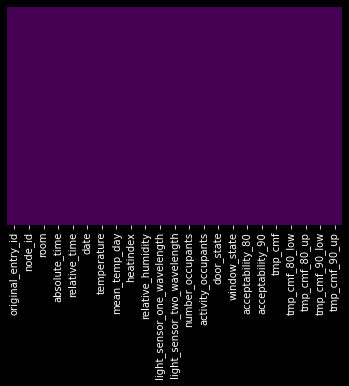

In [31]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [32]:
df.columns

Index(['original_entry_id', 'node_id', 'room', 'absolute_time',
       'relative_time', 'date', 'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity', 'light_sensor_one_wavelength',
       'light_sensor_two_wavelength', 'number_occupants', 'activity_occupants',
       'door_state', 'window_state', 'acceptability_80', 'acceptability_90',
       'tmp_cmf', 'tmp_cmf_80_low', 'tmp_cmf_80_up', 'tmp_cmf_90_low',
       'tmp_cmf_90_up'],
      dtype='object')

# Univariate
## original_entry_id

In [33]:
df['original_entry_id'].describe()

count    540364.000000
mean       2647.015486
std        2209.330762
min           1.000000
25%         939.000000
50%        2050.000000
75%        3836.000000
max       13349.000000
Name: original_entry_id, dtype: float64

AttributeError: 'dict' object has no attribute 'index'

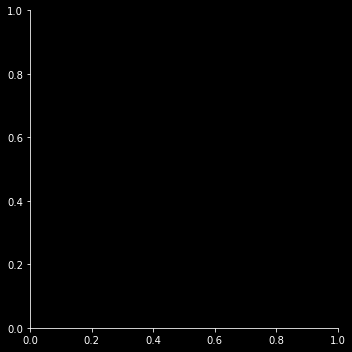

In [56]:
sns.displot(data=df, x='original_entry_id', kind="kde")

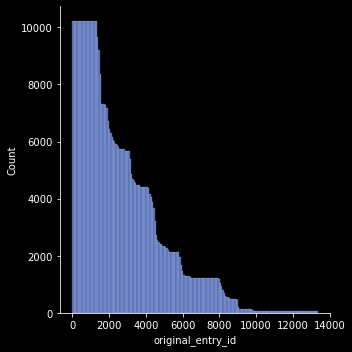

In [55]:
sns.displot(data=df, x='original_entry_id')

### result
original_entry_id should be removed from the data because it doesn't impact the user satisfaction.

## node_id

In [40]:
df['node_id'].describe()

count    540364.000000
mean          2.477682
std           1.176078
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           5.000000
Name: node_id, dtype: float64

<AxesSubplot:xlabel='node_id', ylabel='count'>

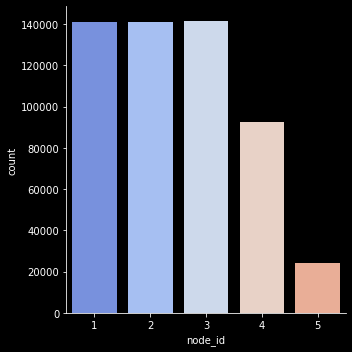

In [41]:
sns.catplot(x="node_id", data=df, kind='count', order=[1,2,3,4,5]).facet_axis(0, 0)

### result
We can see that the first 3 nodes all have the same amount of records,
this is because all 3 rooms in which the experiment took place atleast have 3 nodes.
Then 2 rooms also have another 4th node and one room has a 5th

## room

In [42]:
df['room'].describe()

count     540364
unique         3
top            A
freq      273145
Name: room, dtype: object

<AxesSubplot:xlabel='room', ylabel='count'>

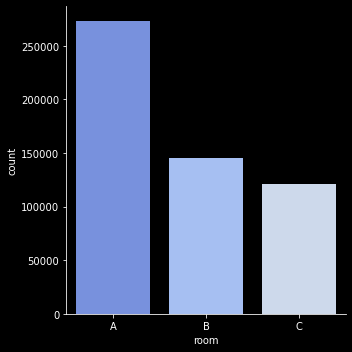

In [43]:
sns.catplot(x="room", data=df, kind='count', order=["A","B","C"]).facet_axis(0, 0)

### result
We can see that there is a clear room with more records than the others, this means that in the final model room A will
be more represented and weigh more in the prediction. We have to think about the implications of this.

## date

In [44]:
date_and_count_array = {}
for index, row in df.iterrows():
    date = row['date'][3:10]
    if date in date_and_count_array:
        date_and_count_array[date] = date_and_count_array.get(date, 0) + 1
    else:
        date_and_count_array[date] = 1

In [12]:
date_count_dataframe = pd.DataFrame(data=date_and_count_array.items(), columns=['date', 'count'])
date_count_dataframe.head()

,date,count
0,03/2016,236420
1,04/2016,182518
2,01/2017,63427
3,02/2017,57999


<AxesSubplot:xlabel='date', ylabel='count'>

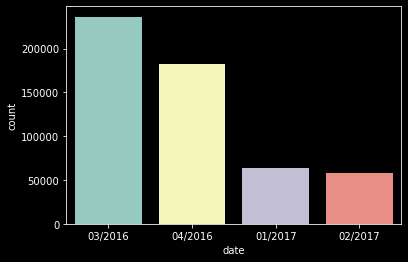

In [13]:
sns.barplot( data=date_count_dataframe, x="date", y="count", order=["03/2016", "04/2016", "01/2017", "02/2017"])

### result
We can see that there is a clear difference with the amount of records per month of recorded data. This can lead to a balance for a more hot climate since the most records come from after winter.
## temperature

In [14]:
df['temperature'].describe()

count    540364.000000
mean         21.966373
std           0.729373
min          20.420000
25%          21.370000
50%          22.020000
75%          22.400000
max          25.470000
Name: temperature, dtype: float64

<AxesSubplot:xlabel='temperature', ylabel='Count'>

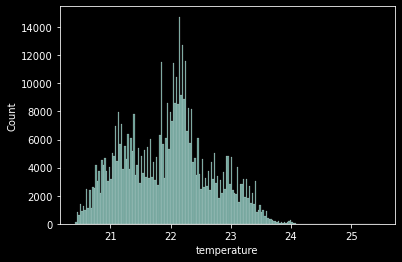

In [15]:
sns.histplot(x="temperature", data=df)

## mean_temp_day

In [16]:
df['mean_temp_day'].describe()

count    540364.000000
mean          7.658971
std           4.082586
min          -3.100000
25%           6.000000
50%           7.300000
75%          10.400000
max          14.700000
Name: mean_temp_day, dtype: float64

<AxesSubplot:xlabel='mean_temp_day', ylabel='Count'>

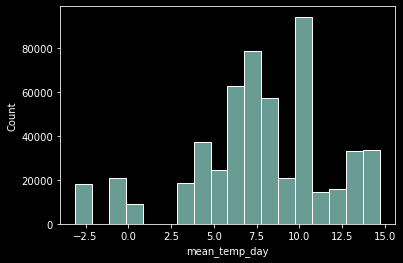

In [17]:
sns.histplot(x="mean_temp_day", data=df, bins=18)

## heatindex

In [18]:
df['heatindex'].describe()

count    540364.000000
mean         21.660889
std           0.609236
min          20.493466
25%          21.198088
50%          21.575511
75%          21.980674
max          25.386476
Name: heatindex, dtype: float64

<AxesSubplot:xlabel='heatindex', ylabel='Count'>

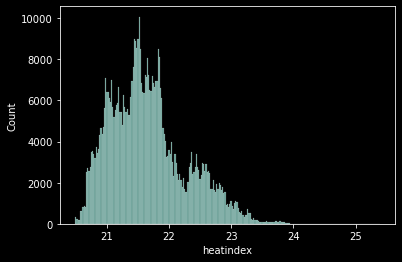

In [19]:
sns.histplot(x="heatindex", data=df)

## relative_humidity

In [20]:
df['relative_humidity'].describe()

count    540364.000000
mean         47.491489
std           6.286487
min          34.516000
25%          42.737000
50%          46.301000
75%          52.255000
max          65.376000
Name: relative_humidity, dtype: float64

<AxesSubplot:xlabel='relative_humidity', ylabel='Count'>

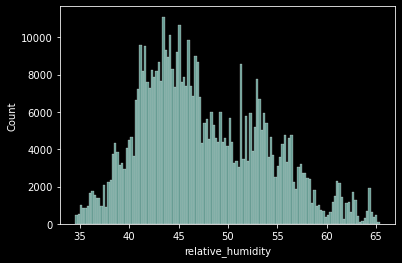

In [21]:
sns.histplot(x="relative_humidity", data=df)

## light_sensors

In [22]:
df['light_sensor_one_wavelength'].describe()

count    540364.000000
mean        221.079310
std          49.571051
min         122.860000
25%         188.570000
50%         210.000000
75%         247.140000
max         482.860000
Name: light_sensor_one_wavelength, dtype: float64

<AxesSubplot:xlabel='light_sensor_one_wavelength', ylabel='Count'>

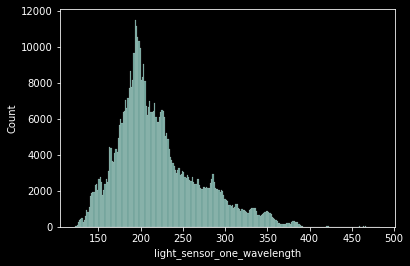

In [23]:
sns.histplot(x="light_sensor_one_wavelength", data=df)

In [24]:
df['light_sensor_two_wavelength'].describe()

count    540364.000000
mean        750.931825
std         354.825810
min         280.600000
25%         501.400000
50%         634.800000
75%         887.800000
max        2401.200000
Name: light_sensor_two_wavelength, dtype: float64

<AxesSubplot:xlabel='light_sensor_two_wavelength', ylabel='Count'>

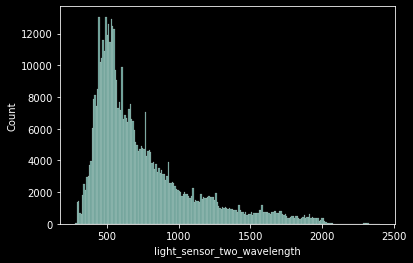

In [25]:
sns.histplot(x="light_sensor_two_wavelength", data=df)

# number_occupants

In [26]:
df['number_occupants'].describe()

count    540364.000000
mean          0.593944
std           0.752355
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: number_occupants, dtype: float64

<AxesSubplot:xlabel='number_occupants', ylabel='count'>

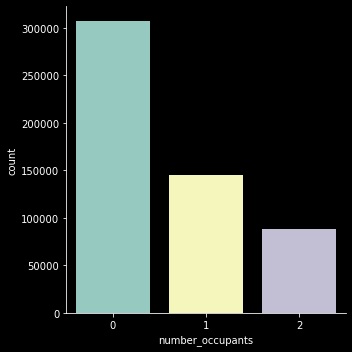

In [27]:
sns.catplot(x="number_occupants", data=df, kind='count', order=[0,1,2]).facet_axis(0, 0)

## activity_occupants

In [28]:
df['activity_occupants'].describe()

count    540364.000000
mean          1.035256
std           1.436075
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max           4.000000
Name: activity_occupants, dtype: float64

<AxesSubplot:xlabel='activity_occupants', ylabel='count'>

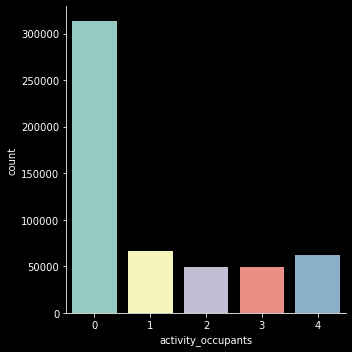

In [29]:
sns.catplot(x="activity_occupants", data=df, kind='count', order=[0,1,2,3,4]).facet_axis(0, 0)

## door_state

In [30]:
df['door_state'].describe()

count    540364.000000
mean          0.119542
std           0.324425
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: door_state, dtype: float64

<AxesSubplot:xlabel='door_state', ylabel='count'>

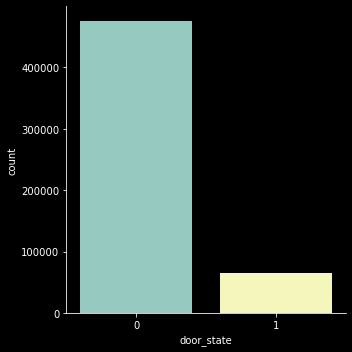

In [31]:
sns.catplot(x="door_state", data=df, kind='count', order=[0,1]).facet_axis(0, 0)

## window_state

In [32]:
df['window_state'].describe()

count    540364.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: window_state, dtype: float64

<AxesSubplot:xlabel='window_state', ylabel='count'>

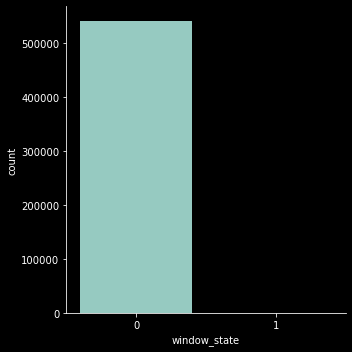

In [33]:
sns.catplot(x="window_state", data=df, kind='count', order=[0,1]).facet_axis(0, 0)

## acceptability_80

In [34]:
df['acceptability_80'].describe()

count    540364.000000
mean          0.611717
std           0.487360
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: acceptability_80, dtype: float64

<AxesSubplot:xlabel='acceptability_80', ylabel='count'>

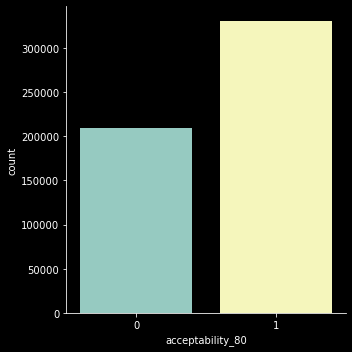

In [35]:
sns.catplot(x="acceptability_80", data=df, kind='count', order=[0,1]).facet_axis(0, 0)

## acceptability_90

In [36]:
df['acceptability_90'].describe()

count    540364.000000
mean          0.417654
std           0.493173
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: acceptability_90, dtype: float64

<AxesSubplot:xlabel='acceptability_90', ylabel='count'>

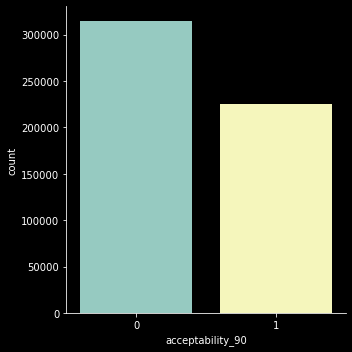

In [37]:
sns.catplot(x="acceptability_90", data=df, kind='count', order=[0,1]).facet_axis(0, 0)

## tmp_cmf

In [38]:
df['tmp_cmf'].describe()

count    540364.000000
mean         21.088677
std           0.410038
min          20.900000
25%          20.900000
50%          20.900000
75%          21.024000
max          22.357000
Name: tmp_cmf, dtype: float64

<AxesSubplot:xlabel='tmp_cmf', ylabel='Count'>

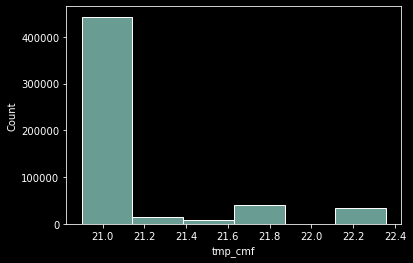

In [39]:
sns.histplot(x="tmp_cmf", data=df, bins=6)

## tmp_cmf_80_low

In [40]:
df['tmp_cmf_80_low'].describe()

count    540364.000000
mean         21.488677
std           0.410038
min          21.300000
25%          21.300000
50%          21.300000
75%          21.424000
max          22.757000
Name: tmp_cmf_80_low, dtype: float64

<AxesSubplot:xlabel='tmp_cmf_80_low', ylabel='Count'>

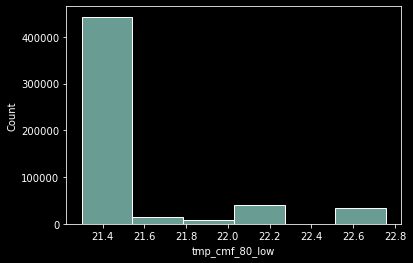

In [41]:
sns.histplot(x="tmp_cmf_80_low", data=df, bins=6)

## tmp_cmf_80_up

In [42]:
df['tmp_cmf_80_up'].describe()

count    540364.000000
mean         22.688677
std           0.410038
min          22.500000
25%          22.500000
50%          22.500000
75%          22.624000
max          23.957000
Name: tmp_cmf_80_up, dtype: float64

<AxesSubplot:xlabel='tmp_cmf_80_up', ylabel='Count'>

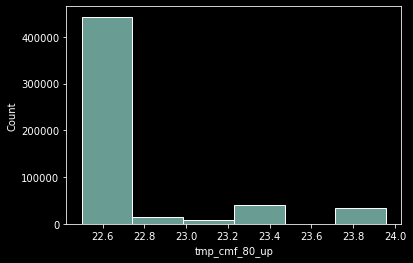

In [43]:
sns.histplot(x="tmp_cmf_80_up", data=df, bins=6)

## tmp_cmf_90_low

In [44]:
df['tmp_cmf_90_low'].describe()

count    540364.000000
mean         21.288677
std           0.410038
min          21.100000
25%          21.100000
50%          21.100000
75%          21.224000
max          22.557000
Name: tmp_cmf_90_low, dtype: float64

<AxesSubplot:xlabel='tmp_cmf_90_low', ylabel='Count'>

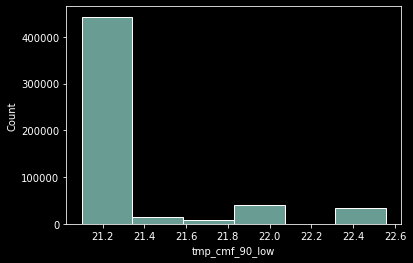

In [45]:
sns.histplot(x="tmp_cmf_90_low", data=df, bins=6)

## tmp_cmf_90_up

In [46]:
df['tmp_cmf_90_up'].describe()

count    540364.000000
mean         22.188677
std           0.410038
min          22.000000
25%          22.000000
50%          22.000000
75%          22.124000
max          23.457000
Name: tmp_cmf_90_up, dtype: float64

<AxesSubplot:xlabel='tmp_cmf_90_up', ylabel='Count'>

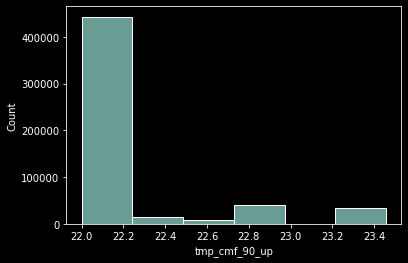

In [47]:
sns.histplot(x="tmp_cmf_90_up", data=df, bins=6)